# Chapter 5. 오차역전파법 (Back Propagation)

**실습문제**: 본 문서에 나오는 파이썬/넘파이 스크립트에서 None과 pass로 표시된 곳을 찾아서 적절한 코드로 대체하시오.

가중치 매개변수에 대한 손실함수의 기울기를 구하는 방법:
- 수치미분 : Chapter 4
- 오차역전파 : Chapter 5

오차역전파(back propagation) 구현 방법:
- 수식을 이용하는 방법
- 계산그래프를 이용하는 방법 (본 교재)

## 5.1 계산 그래프

- 그래프 자료구조 : 노드(node)와 에지(edge)로 데이터를 표현 

### 5.1.1 계산 그래프로 풀다

문제1: 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.

<img src="fig-5-2.png" width="700">

문제2: 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요.

<img src="fig-5-3.png" width="700">

순전파(forward propagation) : 계산 그래프에서 계산을 왼쪽에서 오른쪽으로 진행

### 5.1.2 국소적 계산

각 노드는 자신과 관련한 계산 외에는 아무것도 신경 쓸 게 없다.

<img src="fig-5-4.png" width="700">

### 5.1.3 왜 계산 그래프로 푸는가?

- 국소적 계산 : 전체 계산이 복잡하더라도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화 할 수 있음
- 중간 계산 결과를 보관할 수 있음
- 역전파 때 미분을 효율적으로 계산할 수 있음

예) 사과 가격에 대한 지불 금액의 미분값을 역전파로 전달

<img src="fig-5-5.png" width="700">

## 5.2 연쇄 법칙 (chain rule)

### 5.2.1 계산 그래프의 역전파

$y = f(x)$에 대한 역전파(back propagation) : 상류로 부터 전달된 값($E$)에 국소적 미분($\frac{\partial y}{\partial x}$)을 곱하여 하류(앞쪽 노드)로 전달
<img src="fig-5-6.png" width="300">

### 5.2.2 연쇄법칙이란?

- 합성함수의 미분에 관한 법칙

아래의 식에 대한 미분을 구해보자:
$$ z = \big( x+y \big)^2 $$ 

위의 식은 아래의 두개의 식으로 나눌 수 있다:
<img src="e-5.1.png" width="100">

$\frac{\partial z}{\partial x}$를 아래와 같이 국소적 미분(편미분)으로 나타낼 수 있다:
<img src="e-5.2.png" width="120">

각 국소적 미분을 구하면:
<img src="e-5.3.png" width="80">

연쇄법칙을 써서 국소적 미분을 곱하면:
<img src="e-5.4.png" width="250">

### 5.2.3 연쇄법칙과 계산 그래프

연쇄법칙을 계산그래프의 역전파로로 나타내면:
<img src="fig-5-7.png" width="500">

5.2.2절의 식을 계산그래프에 대입하면:
<img src="fig-5-8.png" width="500">

## 5.3 역전파

### 5.3.1 덧셈노드의 역전파

$ z = x+y \;\; \implies \;\; \frac{\partial z}{\partial x} = 1 , \frac{\partial z}{\partial y} = 1 $

덧셈노드의 역전파는 입력값을 그대로 하류로 흘려보낸다.
<img src="fig-5-9.png" width="600">

### 5.3.2 곱셈노드의 역전파

$ z = xy \;\; \implies \;\; \frac{\partial z}{\partial x} = y , \frac{\partial z}{\partial y} = x $

곱셈노드의 역전파는 입력고 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다.
<img src="fig-5-12.png" width="600">

### 5.3.3 사과 쇼핑의 예

<img src="fig-5-14.png" width="600">

**실습문제**: 아래는 사과와 귤 쇼핑에 대한 계산 그래프이다. 빈 상자 안에 적절한 숫자를 넣어 역전파를 완성하시오.

<img src="fig-5-15.png" width="700">

## 5.4 단순한 계층 구현하기

### 5.4.1 곱셈 계층

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x    # x,y는 backward에서 사용하기 위해 저장
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

### 5.4.2 덧셈 계층

In [2]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

## 5.5 활성화 함수 계층 구현하기

### 5.5.1 ReLU 계층

ReLU 함수:
<img src="e-5.7.png" width="120">

ReLU 함수의 미분:
<img src="e-5.8.png" width="140">

ReLU 계층의 계산그래프:
<img src="fig-5-18.png" width="500">

In [3]:
# common/layers.py

class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)    # mask는 True/False로 구성된 넘파이 배열
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

위의 ReLU 클래스에서 mask라는 인스턴스 변수는 True/False로 구성된 넘파이 배수이다.
mask 사용 예는 아래와 같다:

In [4]:
# mask 사용 예
import numpy as np

x = np.array( [ [1.0, -0.5], [-2.0, 3.0] ] )
print(x)
mask = (x <= 0)
print(mask)
x[mask] = 0
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]
[[1. 0.]
 [0. 3.]]


### 5.5.2 Sigmoid 계층

Sigmoid 함수:
<img src="e-5.9.png" width="140">

Sigmoid 계층의 계산그래프:
<img src="fig-5-20.png" width="600">

Sigmoid 계층의 계산그래프 (간소화 버전):
<img src="fig-5-21.png" width="300">

위의 계산그래프에 있는 수식을 정리하면:
<img src="e-5.12.png" width="350">

Sigmoid 계층의 계산그래프 (최종) : 순전파의 출력 $y$ 만으로 역전파를 계산할 수 있다
<img src="fig-5-22.png" width="300">

In [5]:
# common/layers.py
from common import *

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## 5.6 Affine/Softmax 계층 구현하기

### 5.6.1 Affine 계층

Affine Transformation : Y = np.dot(X,W) + B

Affine 계층의 계산그래프 (순전파): 변수가 다차원 배열임
<img src="fig-5-24.png" width="300">

행렬곱(dot)에 대한 역전파 : $\textbf{X}, \textbf{W}$에 대한 편미분
<img src="e-5.13.png" width="150">

행렬곱(dot 노드)에 대한 계산그래프 (역전파): $\textbf{X}$와 $\frac{\partial L}{\partial \textbf{X}}$의 형상은 일치해야 함
<img src="fig-5-26.png" width="400">

Affine 계층의 계산그래프 (역전파): 
<img src="fig-5-25.png" width="500">

### 5.6.2 배치용 Affine 계층

배치용 Affine 계층의 계산그래프 : 
- $\textbf{X}$와 $\frac{\partial L}{\partial \textbf{X}}$의 형상이 (N,2)로 바뀜
- $\frac{\partial L}{\partial \textbf{X}}$과 $\frac{\partial L}{\partial \textbf{W}}$는 행렬의 형상만 고려하면 5.6.1절의 식과 같음 
- $\frac{\partial L}{\partial \textbf{B}}$를 구할 때는 주의가 필요함
<img src="fig-5-27.png" width="500">

순전파일 때 $\textbf{B}$는 $\textbf{X} \cdot \textbf{W}$의 각 데이터에 더해진다. 아래는 그 예이다.

In [6]:
X_dot_W = np.array( [ [0, 0, 0], [10, 10, 10] ] )
B = np.array([1, 2, 3])
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

따라서 역전파 때는 각 데이터의 역전파 값이 $\textbf{B}$의 역전파로 모여야 한다. 즉, $\frac{\partial L}{\partial \textbf{B}}$로 모여야 한다.

In [7]:
dY = np.array( [ [1,2,3], [4,5,6] ] )
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [8]:
# common/layers.py

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

### 5.6.3 Softmax-with-Loss 계층

소프트맥스 함수는 입력 값을 정규화(출력의 합이 1이 되도록 변형)하여 출력한다.

$$ y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} $$
<img src="fig-5-28.png" width="600">

Softmax-with-Loss 계층의 계산그래프:

$$ CEE = - \sum_k t_{k} \log y_{k} $$
$$ CEE(batch) = - \frac{1}{N} \sum_n \sum_k t_{nk} \log y_{nk} $$
<img src="fig-5-29.png" width="800">

Softmax-with-Loss 계층의 계산그래프 (간소화 버전):
<img src="fig-5-30.png" width="600">

In [9]:
# common/layers.py
from common import *

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  # 손실
        self.y = None     # softmax의 출력
        self.t = None     # 정답 레이블 (원-핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size    # 데이터 1개당 오차를 앞 계층으로 전파
        
        return dx


## 5.7 오차역전파법 구현하기

### 5.7.1 신경망 학습의 전체 그림

<img src="p180.JPG" width="800">

### 5.7.2 오차역전파법을 적용한 신경망 구현하기

<img src="p181.JPG" width="800">

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성 
        self.layers = OrderedDict()    # 순서가 있는 딕셔너리 
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        #self.layers['Sigmoid1'] = Sigmoid()    # ReLU 대신 Sigmoid로 하면?
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:입력 데이터, t:정답 레이블 
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:입력 데이터, t:정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


### 5.7.3 오차역전파법으로 구한 기울기 검증하기

- 생략 (교재를 참조하세요)

### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 구하기 
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, train_acc, test_acc)


0 0.11688333333333334 0.1154
600 0.9044666666666666 0.9081
1200 0.9220333333333334 0.9238
1800 0.9332 0.9335
2400 0.9432833333333334 0.9419
3000 0.95175 0.9478
3600 0.9576333333333333 0.9528
4200 0.9616333333333333 0.9573
4800 0.96515 0.9601
5400 0.9686 0.9627
6000 0.9706 0.9643
6600 0.9723333333333334 0.9662
7200 0.9751 0.9693
7800 0.97595 0.9694
8400 0.97795 0.9695
9000 0.9788666666666667 0.9705
9600 0.97975 0.9712


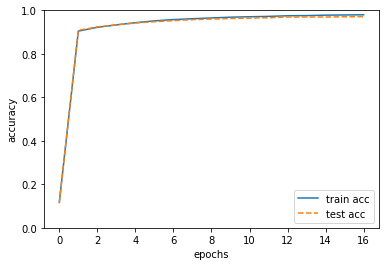

In [17]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**실습문제1**: 5.7절의 2층 신경망을 3층 신경망으로 확장하여 구현하고 그 결과를 2층 신경망과 비교하시오. 단, hidden layer1의 뉴런 수는 50개, hidden layer2의 뉴런 수는 100개로 하시오. 

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class ThreeLayerNet:

    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden1_size)
        self.params['b1'] = np.zeros(hidden1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden1_size, hidden2_size)
        self.params['b2'] = np.zeros(hidden2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성 
        self.layers = OrderedDict()    # 순서가 있는 딕셔너리 
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:입력 데이터, t:정답 레이블 
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:입력 데이터, t:정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])        
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads


In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = ThreeLayerNet(input_size=784, hidden1_size=50, hidden2_size=100, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 구하기 
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, train_acc, test_acc)

0 0.09736666666666667 0.0982
600 0.77405 0.7817
1200 0.89615 0.895
1800 0.9312 0.9288
2400 0.9416666666666667 0.9395
3000 0.9538 0.9489
3600 0.9624333333333334 0.9576
4200 0.9665333333333334 0.9617
4800 0.96985 0.964
5400 0.9717666666666667 0.9634
6000 0.97645 0.9687
6600 0.9784333333333334 0.969
7200 0.9767333333333333 0.9657
7800 0.9791166666666666 0.969
8400 0.9820833333333333 0.9697
9000 0.9843833333333334 0.9694
9600 0.98385 0.9698


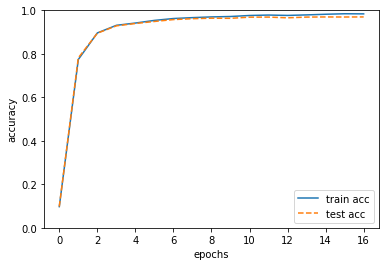

In [16]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**실습문제2**: MNIST 데이터를 이용하여 3.6절에 있는 3층 신경망의 매개변수를 학습하여 구현하시오. 구현된 결과를 3.6절의 정확도와 비교하고, 4.5절의 2층 신경망과도 학습시간과 정확도를 비교하시오. 

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class ThreeLayerNet:

    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden1_size)
        self.params['b1'] = np.zeros(hidden1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden1_size, hidden2_size)
        self.params['b2'] = np.zeros(hidden2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성 
        self.layers = OrderedDict()    # 순서가 있는 딕셔너리 
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:입력 데이터, t:정답 레이블 
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:입력 데이터, t:정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])        
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = ThreeLayerNet(input_size=784, hidden1_size=50, hidden2_size=100, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 구하기 
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, train_acc, test_acc)

0 0.11236666666666667 0.1135
600 0.09915 0.1009
1200 0.09736666666666667 0.0982
1800 0.11236666666666667 0.1135
2400 0.10441666666666667 0.1028
3000 0.10218333333333333 0.101
3600 0.13956666666666667 0.1495
4200 0.3106333333333333 0.3094
4800 0.47058333333333335 0.4661
5400 0.6447833333333334 0.6433
6000 0.7699333333333334 0.7704
6600 0.8351666666666666 0.8402
7200 0.8587666666666667 0.8631
7800 0.87285 0.8755
8400 0.8852333333333333 0.8861
9000 0.8949166666666667 0.8948
9600 0.9008 0.9013


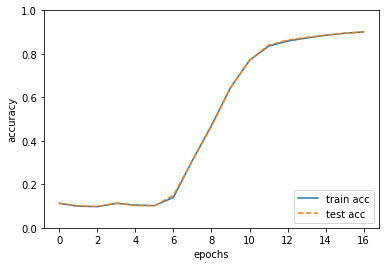

In [14]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()